# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Arkan Hariz Chandarawinata Liem  
**NIM:** 122140038  

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

## Load Library

In [37]:
import numpy as np  
import matplotlib.pyplot as plt  
import cv2  
import os  

print(f"Versi numpy: {np.__version__}")
print(f"Versi matplotlib: {plt.matplotlib.__version__}")
print(f"Versi OpenCV: {cv2.__version__}")

Versi numpy: 2.2.6
Versi matplotlib: 3.10.7
Versi OpenCV: 4.11.0


### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


### Cropping Kotak Persegi Area Wajah

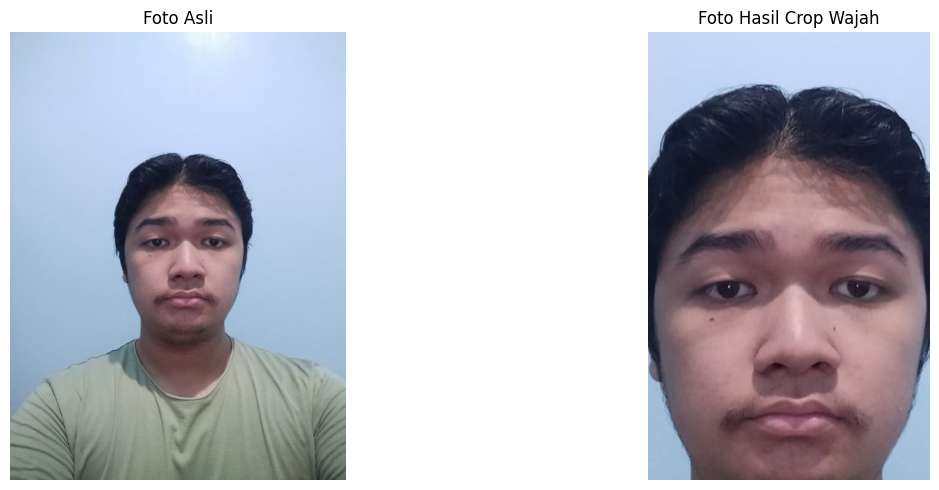

Hasil cropping berhasil disimpan di: d:\ALIEM1\Semester_7\MULTIMEDIA\PERTEMUAN_11\results_ws4\crop_area_wajah.jpg
(700, 440, 3)


In [38]:
# Path foto
img_path = os.path.join(os.getcwd(), 'assets_ws4', 
                                     'foto_pribadi.jpg')
crop_face = cv2.imread(img_path)

# Konversi BGR -> RGB
crop_face = cv2.cvtColor(crop_face, cv2.COLOR_BGR2RGB)

# Crop area wajah
img_cropped_face = crop_face[350:1050, 400:840]

# Plot foto
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(crop_face)
axs[0].set_title('Foto Asli')
axs[0].axis('off')

axs[1].imshow(img_cropped_face)
axs[1].set_title('Foto Hasil Crop Wajah')
axs[1].axis('off')

plt.tight_layout()
plt.show()

#Simpan hasil cropping
output_dir = os.path.join(os.getcwd(), 'results_ws4')
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, 'crop_area_wajah.jpg')
cv2.imwrite(output_path, cv2.cvtColor(img_cropped_face, 
                                      cv2.COLOR_BGR2RGB))

print(f"Hasil cropping berhasil disimpan di: {output_path}")

print(img_cropped_face.shape)

### Cropping Persegi Panjang Area Latar Belakang

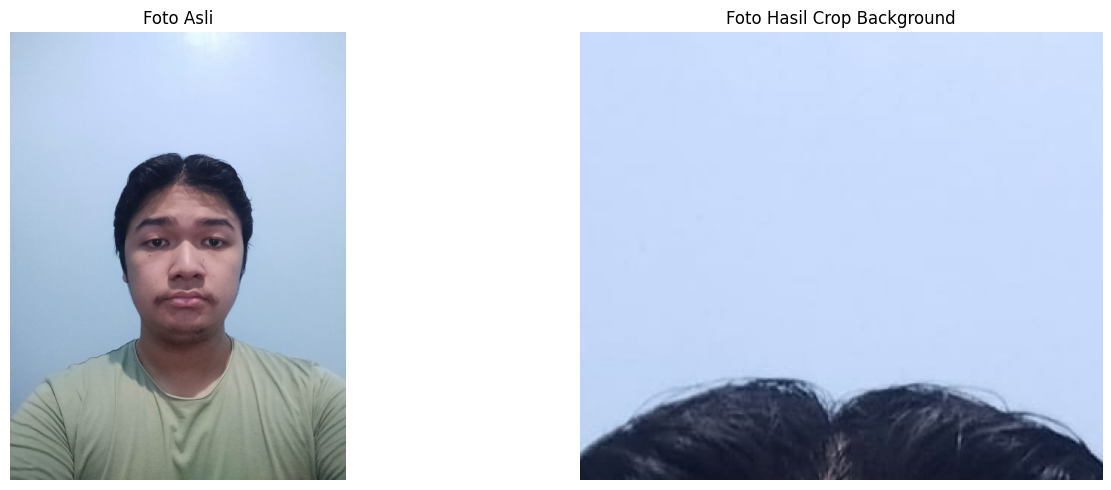

Hasil cropping berhasil disimpan di: d:\ALIEM1\Semester_7\MULTIMEDIA\PERTEMUAN_11\results_ws4\crop_area_background.jpg
(300, 350, 3)


In [39]:
# Baca foto
crop_bg = cv2.imread(img_path)

# Konversi BGR -> RGB
crop_bg = cv2.cvtColor(crop_bg, cv2.COLOR_BGR2RGB)

# Crop background
img_cropped_bg = crop_bg[200:500, 450:800]

# Plot foto
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(crop_bg)
axs[0].set_title('Foto Asli')
axs[0].axis('off')

axs[1].imshow(img_cropped_bg)
axs[1].set_title('Foto Hasil Crop Background')
axs[1].axis('off')

plt.tight_layout()
plt.show()

#Simpan hasil cropping
output_dir = os.path.join(os.getcwd(), 'results_ws4')
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, 'crop_area_background.jpg')
cv2.imwrite(output_path, cv2.cvtColor(img_cropped_bg, 
                                      cv2.COLOR_BGR2RGB))

print(f"Hasil cropping berhasil disimpan di: {output_path}")

print(img_cropped_bg.shape)

### Resize Kedua Hasil Cropping

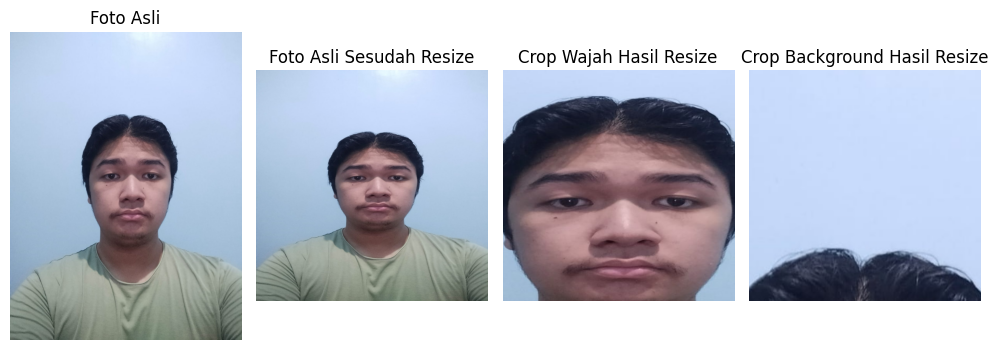

Foto asli sebelum resize:  (1600, 1200, 3)
Foto asli setelah resize:  (920, 920, 3)
crop wajah resize:  (920, 920, 3)
crop background resize:  (920, 920, 3)
Hasil cropping berhasil disimpan di: d:\ALIEM1\Semester_7\MULTIMEDIA\PERTEMUAN_11\results_ws4\crop_wajah_resize.jpg
Hasil cropping berhasil disimpan di: d:\ALIEM1\Semester_7\MULTIMEDIA\PERTEMUAN_11\results_ws4\crop_background_resize.jpg


In [40]:
img = cv2.imread(img_path)

img_face = os.path.join(os.getcwd(), 'results_ws4', 
                                     'crop_area_wajah.jpg')
img_bg = os.path.join(os.getcwd(), 'results_ws4', 
                                   'crop_area_background.jpg')
img_face = cv2.imread(img_face)
img_bg = cv2.imread(img_bg)

# Konversi BGR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_face = cv2.cvtColor(img_face, cv2.COLOR_BGR2RGB)
img_bg = cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)

# Resize
img_resize = cv2.resize(img, (920, 920))
img_face_resize = cv2.resize(img_face, (920, 920))
img_bg_resize = cv2.resize(img_bg, (920, 920))

# Plot hasil
fig, axs = plt.subplots(1, 4, figsize=(10, 5))

# Original
axs[0].imshow(img)
axs[0].set_title("Foto Asli")
axs[0].axis("off")

axs[1].imshow(img_resize)
axs[1].set_title("Foto Asli Sesudah Resize")
axs[1].axis("off")

axs[2].imshow(img_face_resize)
axs[2].set_title("Crop Wajah Hasil Resize")
axs[2].axis("off")

axs[3].imshow(img_bg_resize)
axs[3].set_title("Crop Background Hasil Resize")
axs[3].axis("off")

plt.tight_layout()
plt.show()

print("Foto asli sebelum resize: ", img.shape)
print("Foto asli setelah resize: ", img_resize.shape)
print("crop wajah resize: ", img_face_resize.shape)
print("crop background resize: ", img_bg_resize.shape)

#Simpan hasil cropping
output_dir = os.path.join(os.getcwd(), 'results_ws4')
os.makedirs(output_dir, exist_ok=True)

output_path_1 = os.path.join(output_dir, 'crop_wajah_resize.jpg')
cv2.imwrite(output_path_1, cv2.cvtColor(img_face_resize, 
                                        cv2.COLOR_BGR2RGB))

output_path_2 = os.path.join(output_dir, 'crop_background_resize.jpg')
cv2.imwrite(output_path_2, cv2.cvtColor(img_bg_resize, 
                                        cv2.COLOR_BGR2RGB))

print(f"Hasil cropping berhasil disimpan di: {output_path_1}")
print(f"Hasil cropping berhasil disimpan di: {output_path_2}")

### Grayscale dan HSV

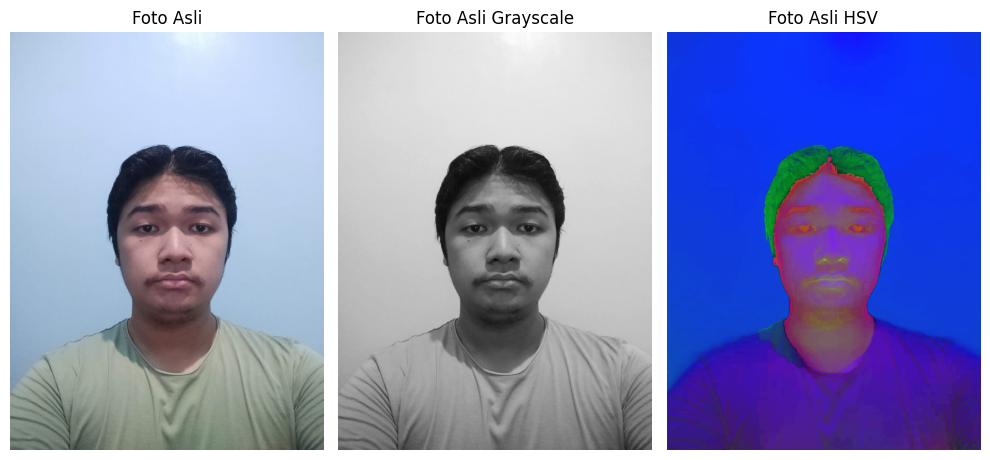

Foto asli:  (1600, 1200, 3)
Foto grayscale:  (1600, 1200)
Foto hsv:  (1600, 1200, 3)
Hasil cropping berhasil disimpan di: d:\ALIEM1\Semester_7\MULTIMEDIA\PERTEMUAN_11\results_ws4\grayscale_picture.jpg
Hasil cropping berhasil disimpan di: d:\ALIEM1\Semester_7\MULTIMEDIA\PERTEMUAN_11\results_ws4\hsv_picture.jpg


In [41]:
# Konversi RGB -> Grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Konversi RGB -> HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Plot hasil
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Original
axs[0].imshow(img)
axs[0].set_title("Foto Asli")
axs[0].axis("off")

axs[1].imshow(img_gray, cmap='gray')
axs[1].set_title("Foto Asli Grayscale")
axs[1].axis("off")

axs[2].imshow(img_hsv)
axs[2].set_title("Foto Asli HSV")
axs[2].axis("off")

plt.tight_layout()
plt.show()

print("Foto asli: ", img.shape)
print("Foto grayscale: ", img_gray.shape)
print("Foto hsv: ", img_hsv.shape)

#Simpan hasil cropping
output_dir = os.path.join(os.getcwd(), 'results_ws4')
os.makedirs(output_dir, exist_ok=True)

output_path_gray = os.path.join(output_dir, 'grayscale_picture.jpg')
cv2.imwrite(output_path_gray, img_gray)

output_path_hsv = os.path.join(output_dir, 'hsv_picture.jpg')
cv2.imwrite(output_path_hsv, img_hsv)

print(f"Hasil cropping berhasil disimpan di: {output_path_gray}")
print(f"Hasil cropping berhasil disimpan di: {output_path_hsv}")

### Anotasi Teks

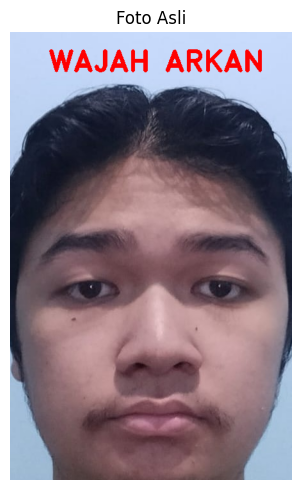

Hasil cropping berhasil disimpan di: d:\ALIEM1\Semester_7\MULTIMEDIA\PERTEMUAN_11\results_ws4\annotated_picture.jpg


In [42]:
crop_face = os.path.join(os.getcwd(), 'results_ws4', 'crop_area_wajah.jpg')
# crop_face = os.path.join(os.getcwd(), 'assets_ws4', 'foto_pribadi.jpg')
crop_face = cv2.imread(crop_face)
crop_face = cv2.cvtColor(crop_face, cv2.COLOR_BGR2RGB)

img_annotated = crop_face.copy()
cv2.putText(img_annotated, 'WAJAH ARKAN', (60, 60), cv2.FONT_HERSHEY_DUPLEX,  
            1.5, (255, 0, 0), 3)  # Merah tebal


# Plot hasil
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

# Original
axs.imshow(img_annotated)
axs.set_title("Foto Asli")
axs.axis("off")

plt.tight_layout()
plt.show()

#Simpan hasil cropping
output_dir = os.path.join(os.getcwd(), 'results_ws4')
os.makedirs(output_dir, exist_ok=True)

output_path_annotated = os.path.join(output_dir, 'annotated_picture.jpg')
cv2.imwrite(output_path_annotated, cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB))

print(f"Hasil cropping berhasil disimpan di: {output_path_annotated}")

### Penjelasan:

#### Efek Cropping
1. **Cropping Area Wajah**
    - Menghasilkan foto close-up yang berfokus pada area wajah dengan dimensi 700x440 piksel
    - Membuang bagian background yang tidak relevan sehingga menonjolkan subjek utama

2. **Cropping Area Background** 
    - Menghasilkan potongan dengan dimensi 300x350 piksel yang fokus pada latar belakang
    - Memperlihatkan detail dan tekstur dari background secara lebih spesifik

#### Efek Konversi Warna
1. **Grayscale**
    - Mengkonversi citra RGB menjadi citra dengan intensitas keabuan (Grayscale)
    - Menghilangkan informasi warna namun mempertahankan struktur dan kontras gambar
    - Membantu menonjolkan tekstur dan bentuk objek dengan lebih jelas
    - Berguna untuk pemrosesan citra lanjutan seperti deteksi tepi, segmentasi, deteksi fitur

2. **HSV (Hue, Saturation, Value)**
    - Merepresentasikan warna dalam komponen:
      - Hue: jenis warna (0-360°)
      - Saturation: tingkat kemurnian warna (0-100%)
      - Value: tingkat kecerahan (0-100%)
    - Lebih intuitif dalam merepresentasikan warna dibanding RGB
    - Memudahkan manipulasi warna spesifik tanpa mempengaruhi brightness
    - Cocok untuk segmentasi warna dan tracking objek

---

### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


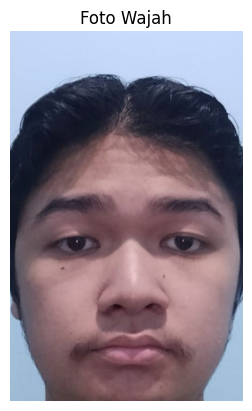

In [43]:
image = os.path.join(os.getcwd(), 'results_ws4', 'crop_area_wajah.jpg')
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title('Foto Wajah')
plt.axis('off')
plt.show()

### Manipulasi Channel Warna

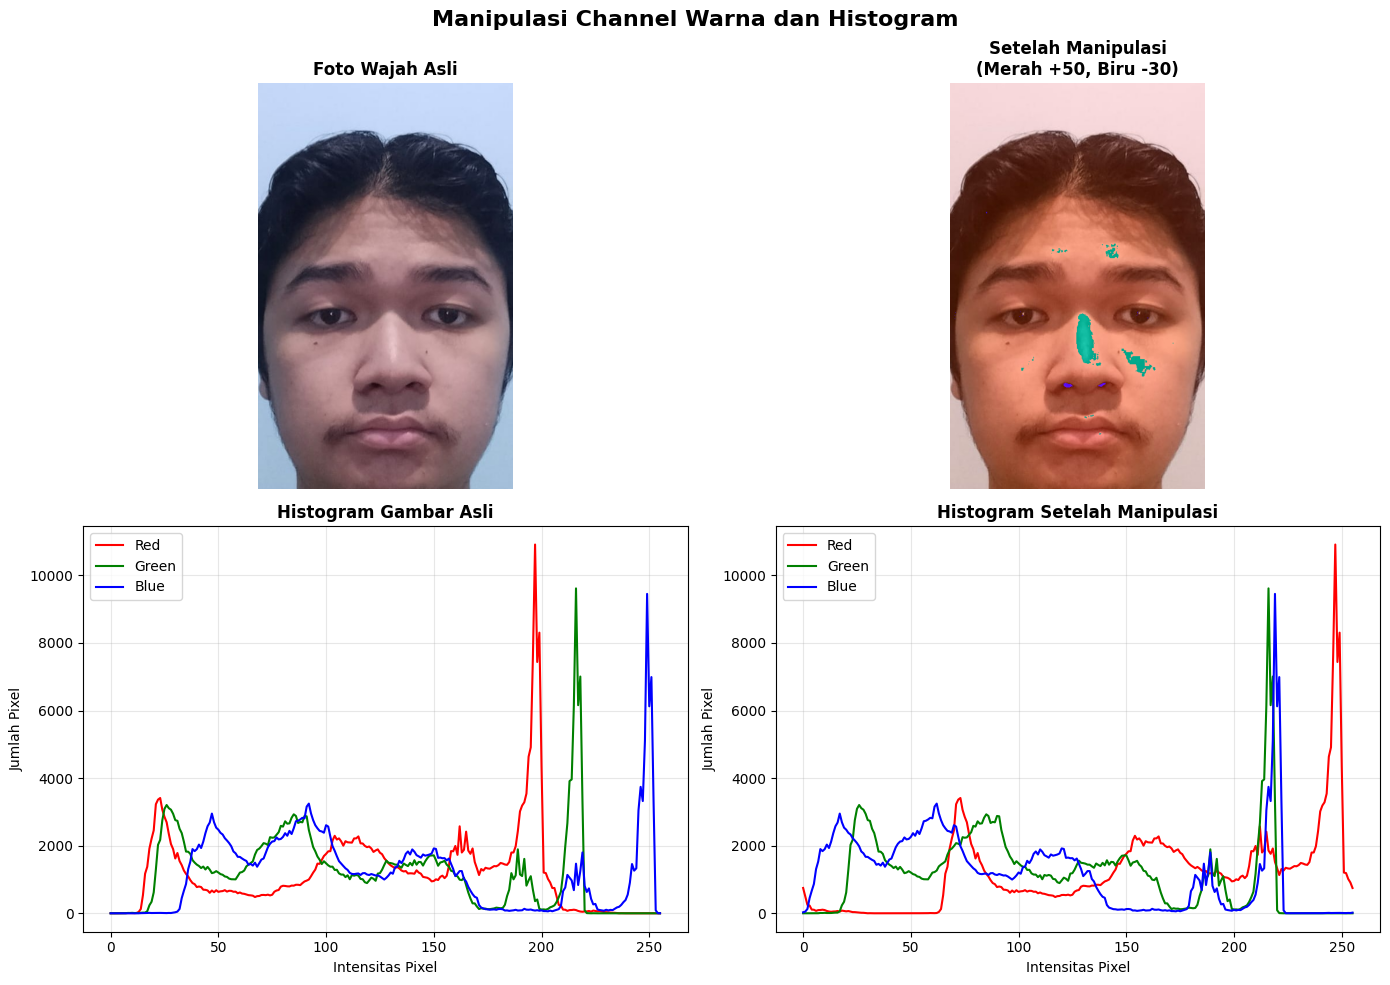

In [44]:
# Copy gambar untuk manipulasi
image_manipulated = image.copy()

# 1. Naikkan intensitas channel MERAH sebanyak 50 poin (maksimum 255)
image_manipulated[:, :, 0] = np.clip(image_manipulated[:, :, 0] + 50, 0, 255)

# 2. Turunkan intensitas channel BIRU sebanyak 30 poin (minimum 0)
image_manipulated[:, :, 2] = np.clip(image_manipulated[:, :, 2] - 30, 0, 255)

# Tampilkan hasil perbandingan dengan histogram
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Manipulasi Channel Warna dan Histogram', fontsize=16, fontweight='bold')

# Gambar Asli
axes[0, 0].imshow(image)
axes[0, 0].set_title('Foto Wajah Asli', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# Gambar Setelah Manipulasi
axes[0, 1].imshow(image_manipulated)
axes[0, 1].set_title('Setelah Manipulasi\n(Merah +50, Biru -30)', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

# Histogram Gambar Asli
colors = ('red', 'green', 'blue')
for i, color in enumerate(colors):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    axes[1, 0].plot(histogram, color=color, label=color.capitalize())
axes[1, 0].set_title('Histogram Gambar Asli', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Intensitas Pixel')
axes[1, 0].set_ylabel('Jumlah Pixel')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Histogram Gambar Manipulasi
for i, color in enumerate(colors):
    histogram = cv2.calcHist([image_manipulated], [i], None, [256], [0, 256])
    axes[1, 1].plot(histogram, color=color, label=color.capitalize())
axes[1, 1].set_title('Histogram Setelah Manipulasi', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Intensitas Pixel')
axes[1, 1].set_ylabel('Jumlah Pixel')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Histogram Dari Masing Masing Channel

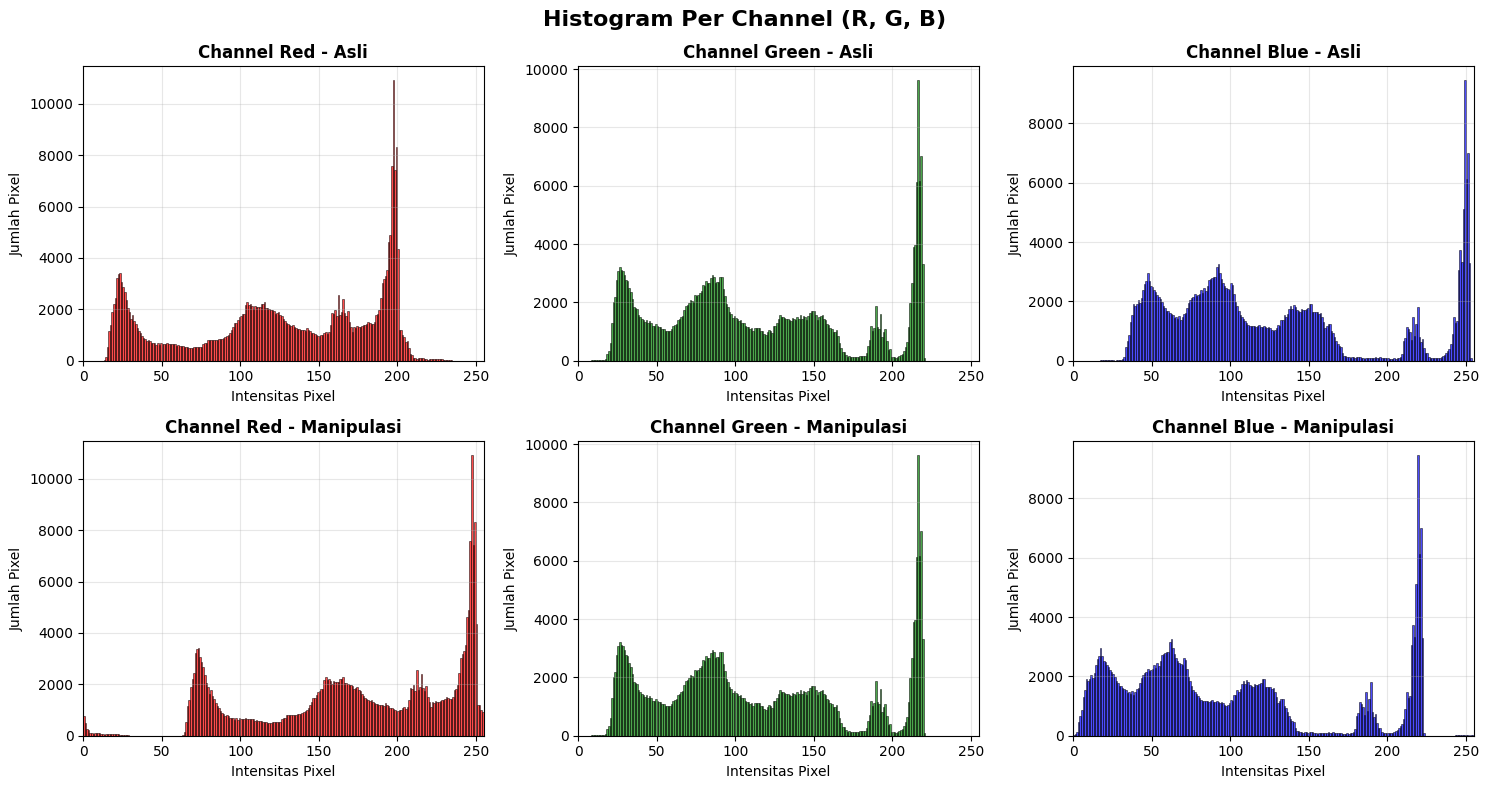

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Histogram Per Channel (R, G, B)', fontsize=16, fontweight='bold')

channels = ['Red', 'Green', 'Blue']
colors = ['red', 'green', 'blue']

# Baris 1: Histogram Gambar Asli per channel
for i, (channel_name, color) in enumerate(zip(channels, colors)):
    axes[0, i].hist(image[:, :, i].ravel(), bins=256, range=[0, 256], 
                    color=color, alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[0, i].set_title(f'Channel {channel_name} - Asli', fontsize=12, fontweight='bold')
    axes[0, i].set_xlabel('Intensitas Pixel')
    axes[0, i].set_ylabel('Jumlah Pixel')
    axes[0, i].grid(True, alpha=0.3)
    axes[0, i].set_xlim([0, 255])

# Baris 2: Histogram Gambar Manipulasi per channel
for i, (channel_name, color) in enumerate(zip(channels, colors)):
    axes[1, i].hist(image_manipulated[:, :, i].ravel(), bins=256, range=[0, 256], 
                    color=color, alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[1, i].set_title(f'Channel {channel_name} - Manipulasi', fontsize=12, fontweight='bold')
    axes[1, i].set_xlabel('Intensitas Pixel')
    axes[1, i].set_ylabel('Jumlah Pixel')
    axes[1, i].grid(True, alpha=0.3)
    axes[1, i].set_xlim([0, 255])

plt.tight_layout()
plt.show()

### Simpan Dalam Format PNG

In [46]:
image_manipulated = cv2.cvtColor(image_manipulated, cv2.COLOR_BGR2RGB)

output_path_png = os.path.join(os.getcwd(), 'results_ws4', 'manipulasi_warna.png')
cv2.imwrite(output_path_png, image_manipulated)

print(f"Gambar berhasil disimpan di: {output_path_png}")

Gambar berhasil disimpan di: d:\ALIEM1\Semester_7\MULTIMEDIA\PERTEMUAN_11\results_ws4\manipulasi_warna.png


### Penjelasan:

#### 1. Peningkatan Channel Merah (+50)
- Menambah intensitas warna merah sebesar 50 poin membuat gambar terlihat lebih hangat
- Area wajah menjadi lebih kemerahan dan terlihat lebih bernuansa merah muda
- Kontras dengan warna lain meningkat, terutama pada area kulit
- Histogram channel merah bergeser ke kanan, menandakan peningkatan nilai intensitas

#### 2. Penurunan Channel Biru (-30) 
- Pengurangan intensitas biru sebesar 30 poin mengurangi nuansa dingin pada gambar
- Warna kulit menjadi lebih natural dan hangat
- Latar belakang menjadi lebih kuning kecokelatan
- Histogram channel biru bergeser ke kiri, menunjukkan penurunan nilai intensitas

### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


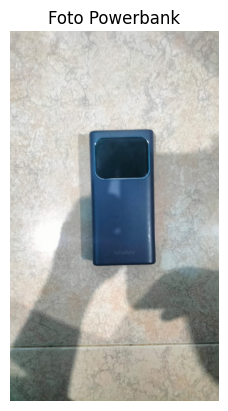

In [47]:
imge_path = os.path.join(os.getcwd(), 'assets_ws4', 'powerbank.jpg')
pb = cv2.imread(imge_path)
pb = cv2.cvtColor(pb, cv2.COLOR_BGR2RGB)

plt.imshow(pb)
plt.title('Foto Powerbank')
plt.axis('off')
plt.show()

### Edge Detection (Canny)

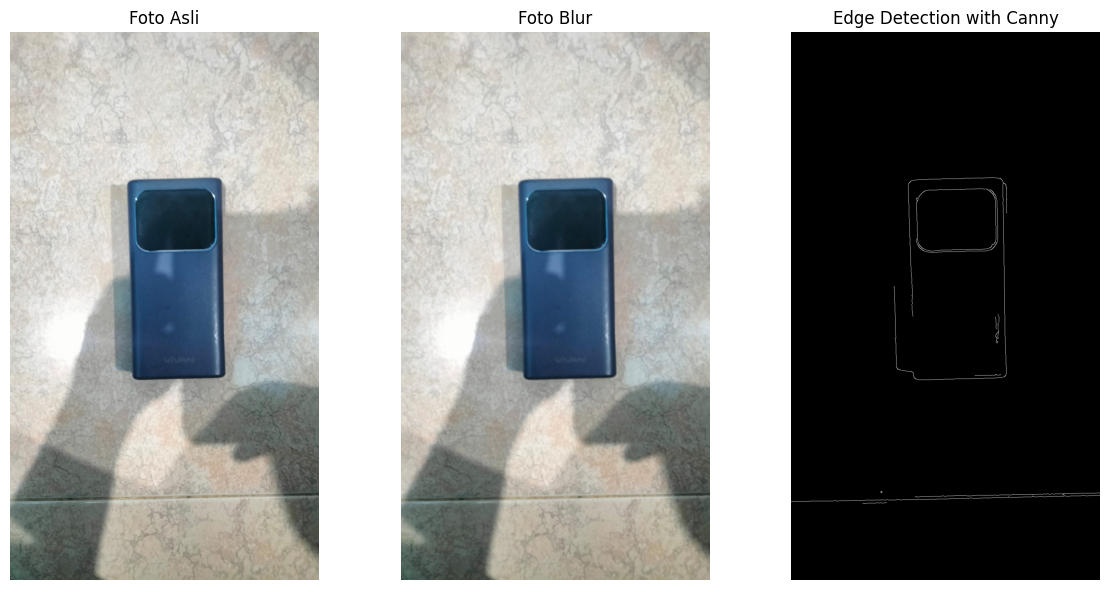

In [48]:
import dlib

pb_blur = cv2.GaussianBlur(pb, (5, 5), 0)

# Canny dengan threshold (50, 150)
edges = cv2.Canny(pb_blur, 50, 150)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(pb)
axs[0].set_title('Foto Asli')
axs[0].axis('off')

axs[1].imshow(pb_blur)
axs[1].set_title('Foto Blur')
axs[1].axis('off')

axs[2].imshow(edges, cmap='gray')
axs[2].set_title('Edge Detection with Canny')
axs[2].axis('off')

plt.tight_layout()
plt.show()

### Bounding Box

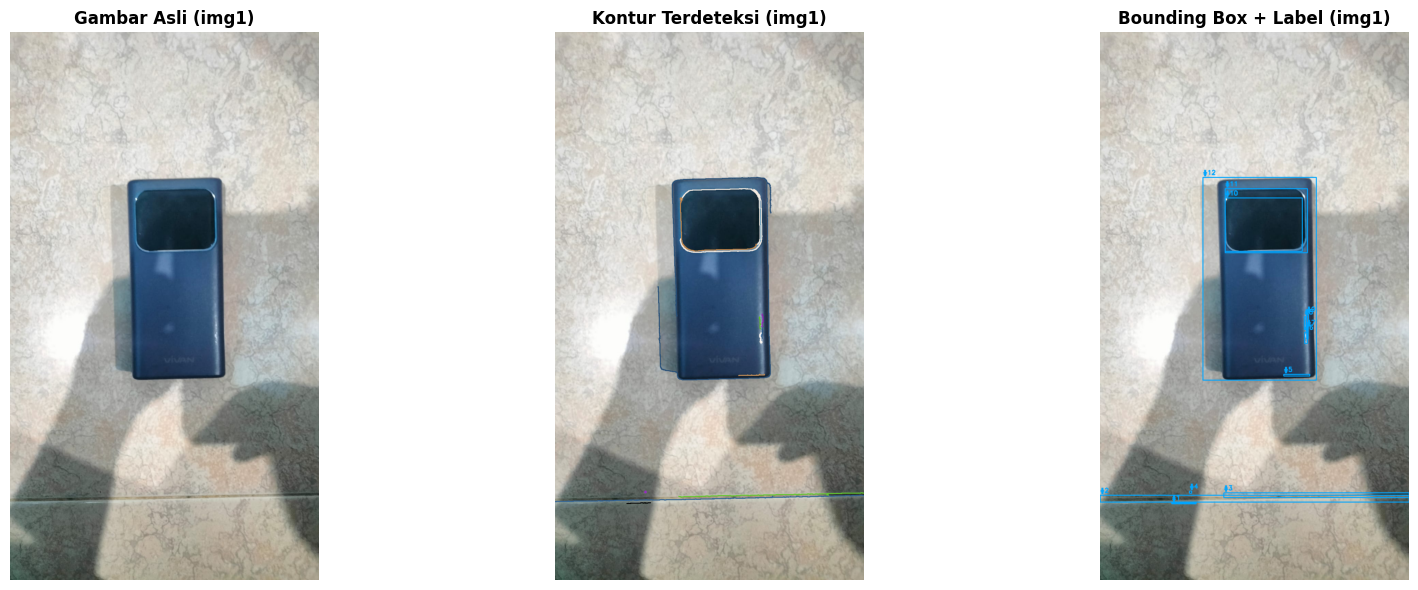

In [49]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

pb_contours = pb.copy()
for idx , c in enumerate(contours):
    color = (
        int((idx * 50) % 255),
        int((idx * 100) % 255),
        int((idx * 150) % 255)
    )
    cv2.drawContours(pb_contours, [c], -1, color, 2)

pb_box = pb.copy()
for idx, c in enumerate(contours):
    x, y, w, h = cv2.boundingRect(c)
    area = cv2.contourArea(c)

    if area > 5000:
        color = (255, 0, 0)
        thickness = 3
    elif area > 2000:
        color = (0, 255, 0)
        thickness = 2
    else:
        color= (0, 165, 255)
        thickness = 2
    
    cv2.rectangle(pb_box, (x, y), (x + w, y + h), color, thickness)

    label = f"#{idx+1}"
    cv2.putText(pb_box, label, (x, y-8), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Visualisasi hasil
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(pb)
axes[0].set_title("Gambar Asli (img1)", fontsize=12, fontweight='bold')
axes[0].axis("off")

axes[1].imshow(pb_contours)
axes[1].set_title("Kontur Terdeteksi (img1)", fontsize=12, fontweight='bold')
axes[1].axis("off")

axes[2].imshow(pb_box)
axes[2].set_title("Bounding Box + Label (img1)", fontsize=12, fontweight='bold')
axes[2].axis("off")

plt.tight_layout()
plt.show()

### Blurring dan Sharpening

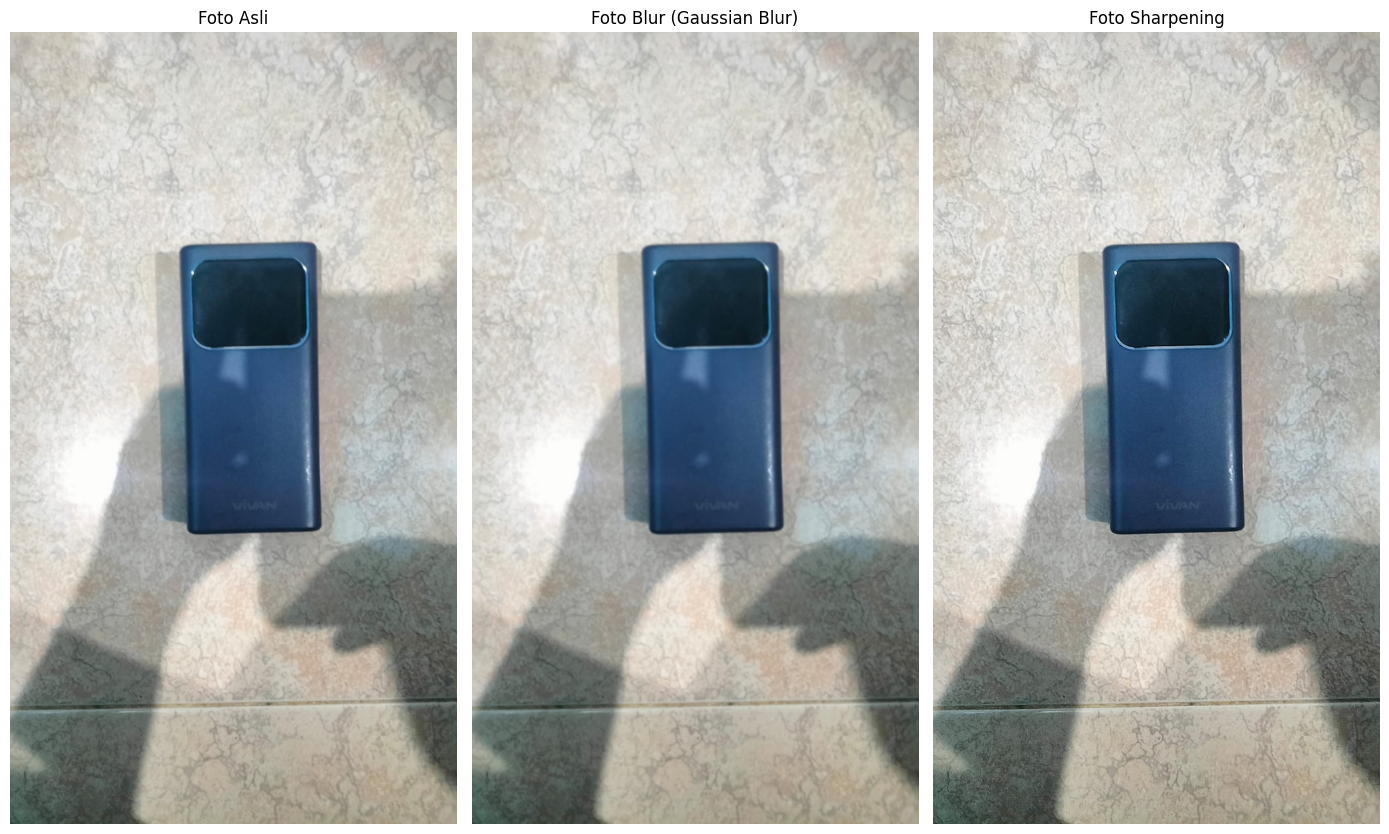

In [50]:
kernel_sharp = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])
pb_sharp = cv2.filter2D(pb, -1, kernel_sharp)
# pb_sharp = cv2.cvtColor(sharp, cv2.COLOR_BGR2RGB)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(14, 10))

axes[0].imshow(pb)
axes[0].set_title('Foto Asli')
axes[0].axis('off')

axes[1].imshow(pb_blur)
axes[1].set_title('Foto Blur (Gaussian Blur)')
axes[1].axis('off')

axes[2].imshow(pb_sharp)
axes[2].set_title('Foto Sharpening')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Penjelasan Blurring dan Sharpening:

#### Dampak Filter Blurring:
- **Gaussian Blur** menghaluskan gambar dengan mengurangi noise dan detail halus
- Tepi objek menjadi lebih lembut dan kurang tajam
- Tekstur pada background menjadi lebih blur/kabur
- Berguna untuk mengurangi noise sebelum proses edge detection

#### Dampak Filter Sharpening:
- Kernel sharpening meningkatkan kontras lokal dan detail tepi
- Tepi objek menjadi lebih tegas dan tajam
- Tekstur dan pola pada gambar menjadi lebih menonjol
- Dapat memunculkan noise yang sebelumnya tidak terlihat
- Meningkatkan ketajaman visual secara keseluruhan

### Penjelasan

#### 1. Edge Detection (Canny)
- Mendeteksi tepi/kontur objek dengan baik, terutama pada bentuk powerbank dan port USB
- Tepi terlihat jelas karena adanya perbedaan intensitas yang signifikan
- Preprocessing blur membantu mengurangi noise sebelum edge detection
- Hasil deteksi tepi memberikan informasi struktur objek yang berguna

#### 2. Gaussian Blur 
- Menghaluskan detail tekstur dan noise pada gambar
- Tepi objek menjadi lebih lembut dan kurang tajam
- Detail halus seperti port dan logo menjadi kabur
- Berguna sebagai preprocessing untuk edge detection

#### 3. Sharpening
- Meningkatkan ketajaman tepi dan detail objek
- Tekstur permukaan powerbank lebih terlihat
- Port dan logo tampak lebih jelas dan tegas
- Dapat memunculkan noise yang sebelumnya tersamarkan

### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

### Deteksi Wajah Dengan Haar Cascade

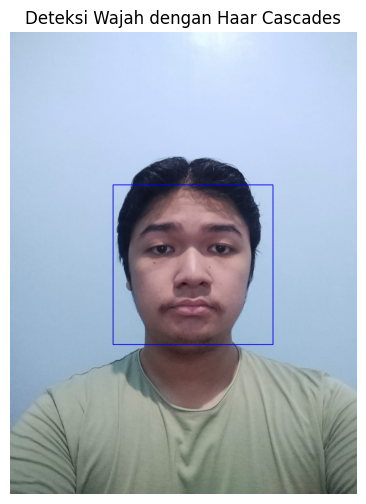

In [51]:
haar_cascade_path = os.path.join(cv2.data.haarcascades, 
                                'haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier(haar_cascade_path)

foto_path = os.path.join(os.getcwd(), 'assets_ws4', 'foto_pribadi.jpg')
self_foto = cv2.imread(foto_path)

# Konversi ke Grayscale
gray_self_foto = cv2.cvtColor(self_foto, cv2.COLOR_BGR2GRAY)

# Deteksi
faces = face_cascade.detectMultiScale(gray_self_foto, 
                                      scaleFactor=1.1, 
                                      minNeighbors=5, 
                                      minSize=(30, 30))

# Draw bounding box
for (x, y, w, h) in faces:
    cv2.rectangle(self_foto, (x, y), (x + w, y + h), (255, 0, 0), 2)

self_foto_rgb = cv2.cvtColor(self_foto, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(self_foto_rgb)
plt.title("Deteksi Wajah dengan Haar Cascades")
plt.axis("off")
plt.show()

### Landmark Menggunakan dlib

In [52]:
import urllib.request

# 1. Persiapan Model 
# Path model landmark Dlib
predictor_path = os.path.join(os.getcwd(), 
                              'shape_predictor_68_face_landmarks.dat')

# URL model Dlib resmi (68 landmark)
predictor_url = "https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2"

# Cek apakah model sudah ada
if not os.path.exists(predictor_path):
    print("Model landmark belum ada. Mengunduh dari GitHub...")
    compressed_path = predictor_path + ".bz2"
    urllib.request.urlretrieve(predictor_url, compressed_path)
    print("Ekstraksi file model...")
    import bz2
    with bz2.open(compressed_path, 'rb') as f_in, open(predictor_path, 'wb') as f_out:
        f_out.write(f_in.read())
    os.remove(compressed_path)
    print("Model berhasil diunduh dan diekstrak.")
else:
    print("Model landmark sudah tersedia di root directory.")

Model landmark sudah tersedia di root directory.


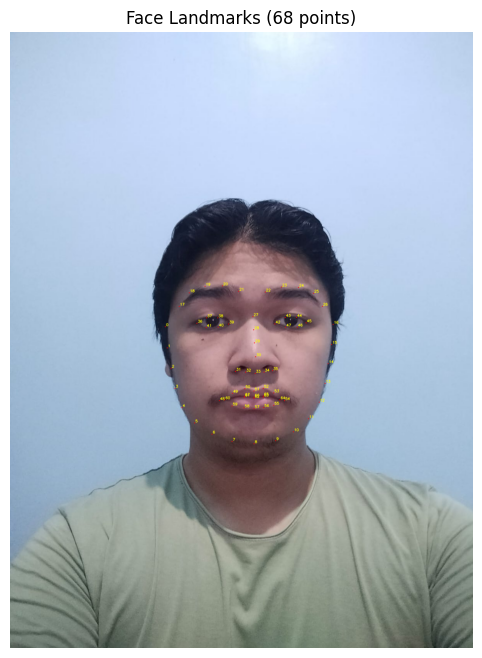

Hasil landmark detection disimpan di: d:\ALIEM1\Semester_7\MULTIMEDIA\PERTEMUAN_11\results_ws4\face_landmarks.jpg


In [53]:
# Inisialisasi detektor wajah dan prediktor landmark
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

# Baca foto
foto_path = os.path.join(os.getcwd(), 'assets_ws4', 
                         'foto_pribadi.jpg')
frame = cv2.imread(foto_path)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Konversi ke grayscale untuk deteksi
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

# Deteksi wajah
faces = detector(gray)

# Gambar landmark untuk setiap wajah terdeteksi
for (i, face) in enumerate(faces):
    # Prediksi landmark wajah
    shape = predictor(gray, face)
    landmarks = np.array([[shape.part(j).x, 
                           shape.part(j).y] for j in range(68)])

    # Gambar titik dan nomor indeks
    for idx, (lx, ly) in enumerate(landmarks):
        cv2.circle(frame, (lx, ly), 1, (255, 0, 0), -1)
        cv2.putText(frame, str(idx), (lx + 2, ly - 2),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.3, 
                    (255, 255, 0), 1, cv2.LINE_AA)

# Tampilkan hasil
plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.title("Face Landmarks (68 points)")
plt.axis("off")
plt.show()

# Simpan hasil
output_path_landmark = os.path.join(os.getcwd(), 'results_ws4', 'face_landmarks.jpg')
cv2.imwrite(output_path_landmark, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
print(f"Hasil landmark detection disimpan di: {output_path_landmark}")


### Image Overlay

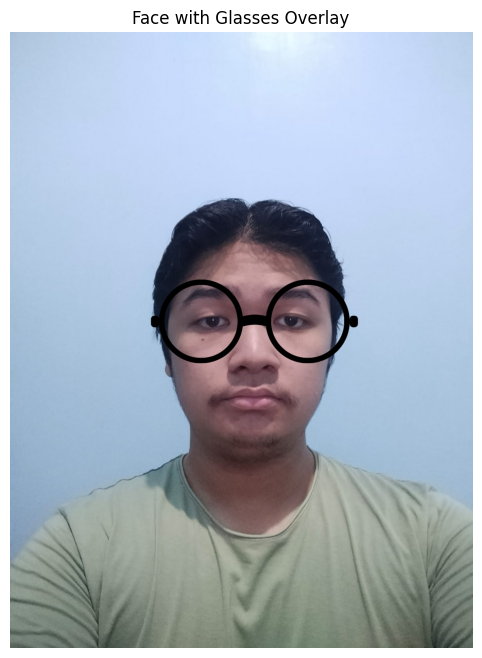

Hasil overlay disimpan di: d:\ALIEM1\Semester_7\MULTIMEDIA\PERTEMUAN_11\results_ws4\face_with_glasses.jpg


In [54]:
# Path gambar kacamata
kacamata_path = os.path.join(os.getcwd(), 'assets_ws4', 
                             'kacamata.png')

# Load gambar kacamata
kacamata = cv2.imread(kacamata_path, cv2.IMREAD_UNCHANGED)

# Inisialisasi detektor dan prediktor wajah
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

# Load gambar wajah
frame = cv2.imread(foto_path)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Konversi ke grayscale untuk deteksi
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
faces = detector(gray)

for face in faces:
    # Ambil dua titik mata (kiri: 36, kanan: 45)
    landmarks = predictor(gray, face)
    left_eye = np.array([landmarks.part(36).x, 
                         landmarks.part(36).y])
    right_eye = np.array([landmarks.part(45).x, 
                          landmarks.part(45).y])

    # Hitung ukuran dan posisi kacamata
    eye_distance = np.linalg.norm(right_eye - left_eye)
    glasses_width = int(2.5 * eye_distance)  # Perbesar sedikit untuk menutupi area mata
    glasses_height = int(kacamata.shape[0] * (glasses_width / kacamata.shape[1]))
    eye_center = np.mean([left_eye, right_eye], axis=0).astype(int)

    # Posisi penempatan kacamata
    x1 = int(eye_center[0] - glasses_width / 2)
    y1 = int(eye_center[1] - glasses_height / 2)
    x2, y2 = x1 + glasses_width, y1 + glasses_height

    # Cegah keluar frame
    if x1 < 0 or y1 < 0 or x2 > frame.shape[1] or y2 > frame.shape[0]:
        continue

    # Resize kacamata
    resized_glasses = cv2.resize(kacamata, (glasses_width, glasses_height))

    # Alpha blending untuk transparansi
    if resized_glasses.shape[2] == 4:  # Jika ada channel alpha
        alpha_mask = resized_glasses[:, :, 3] / 255.0
        alpha_mask = np.dstack([alpha_mask] * 3)
        overlay_color = resized_glasses[:, :, :3]
        roi = frame[y1:y2, x1:x2]
        frame[y1:y2, x1:x2] = (alpha_mask * overlay_color + 
                              (1 - alpha_mask) * roi).astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.title("Face with Glasses Overlay")
plt.axis("off")
plt.show()

# Simpan hasil
output_path_overlay = os.path.join(output_dir, 'face_with_glasses.jpg')
cv2.imwrite(output_path_overlay, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
print(f"Hasil overlay disimpan di: {output_path_overlay}")


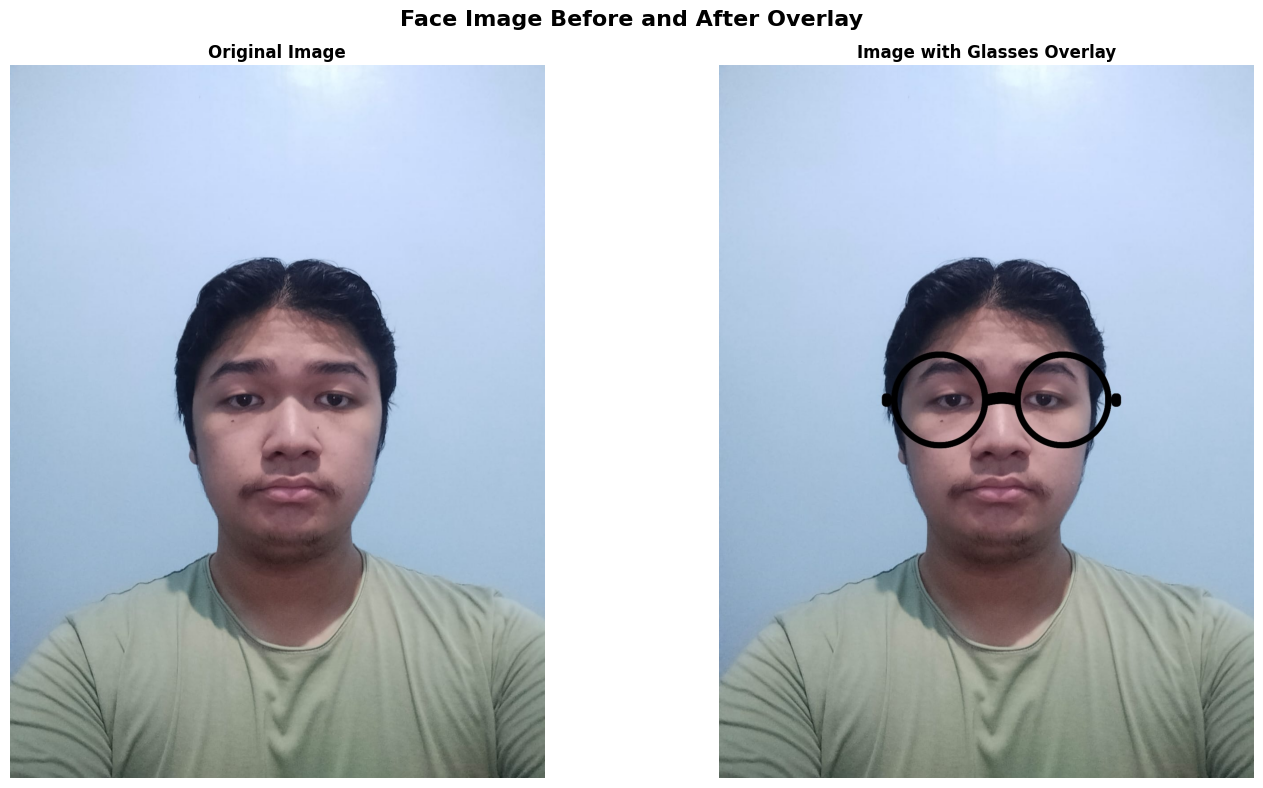

In [55]:
# Create figure for comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('Face Image Before and After Overlay', 
             fontsize=16, fontweight='bold')

# Original image
axes[0].imshow(cv2.cvtColor(cv2.imread(foto_path), 
                            cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image', fontsize=12, 
                  fontweight='bold')
axes[0].axis('off')

# Image with overlay
overlay_result = cv2.cvtColor(cv2.imread(output_path_overlay), 
                              cv2.COLOR_BGR2RGB)
axes[1].imshow(overlay_result)
axes[1].set_title('Image with Glasses Overlay', fontsize=12, 
                  fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### Penjelasan Implementasi Overlay

#### Perhitungan Posisi Overlay
1. **Deteksi Landmark Mata**
    - Menggunakan indeks 36 untuk mata kiri dan 45 untuk mata kanan
    - Posisi mata digunakan sebagai referensi untuk penempatan kacamata
    ```python
    left_eye = np.array([landmarks.part(36).x, landmarks.part(36).y])
    right_eye = np.array([landmarks.part(45).x, landmarks.part(45).y])
    ```

2. **Kalkulasi Dimensi**
    - Lebar kacamata dihitung dari jarak antar mata × 2.5
    - Tinggi kacamata disesuaikan proporsional dengan aspek rasio asli
    ```python
    eye_distance = np.linalg.norm(right_eye - left_eye)
    glasses_width = int(2.5 * eye_distance)
    glasses_height = int(kacamata.shape[0] * (glasses_width / kacamata.shape[1]))
    ```

3. **Penempatan Overlay**
    - Posisi tengah diambil dari rata-rata koordinat kedua mata
    - Offset digunakan untuk mengatur posisi vertikal dan horizontal
    ```python 
    eye_center = np.mean([left_eye, right_eye], axis=0).astype(int)
    x1 = int(eye_center[0] - glasses_width / 2)
    y1 = int(eye_center[1] - glasses_height / 2)
    ```

#### Tantangan Implementasi
1. **Transparansi**
    - Perlu menangani alpha channel untuk transparansi yang natural
    - Implementasi alpha blending untuk hasil yang mulus

2. **Dimensi dan Skalabilitas**
    - Menyesuaikan ukuran overlay agar proporsional dengan wajah
    - Mempertahankan aspek rasio gambar overlay

3. **Boundary Handling**
    - Mencegah overlay keluar dari batas gambar
    - Menangani kasus ketika wajah terlalu dekat dengan tepi

4. **Posisi yang Tepat**
    - Menyesuaikan posisi overlay agar tepat di area mata
    - Mengkompensasi rotasi dan orientasi wajah

5. **Performa**
    - Optimasi operasi gambar untuk kecepatan pemrosesan
    - Efisiensi memori saat menangani gambar besar

### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

In [141]:
paper_path = os.path.join(os.getcwd(), 'assets_ws4', 'paper.jpg')
paper = cv2.imread(paper_path)

# Konversi ke Grayscale
paper_gray = cv2.cvtColor(paper, cv2.COLOR_BGR2GRAY)

# Transformasi Morfologi
h, w = paper.shape[:2]
src_points = np.float32([
    [w * 0.08, h * 0.13],   # Kiri Atas
    [w * 0.75, h * 0.07],   # Kanan Atas
    [w * 0.99, h * 0.54],   # Kanan Bawah
    [w * 0.32, h * 0.65]    # Kiri Bawah
])

width, height = 600, 850
dst_points = np.float32([
    [0, 0],           # Kiri Atas
    [width, 0],       # Kanan Atas
    [width, height],  # Kanan Bawah
    [0, height]       # Kiri Bawah
])

# Hitung Matrix Morfologi
matrix = cv2.getPerspectiveTransform(src_points, dst_points)

# Menerapkan Transformasi Morfologi
paper_warped = cv2.warpPerspective(paper, matrix, 
                                   (width, height))
paper_warped_gray = cv2.cvtColor(paper_warped, 
                                 cv2.COLOR_BGR2GRAY)

paper_with_points = paper.copy()
for i, point in enumerate(src_points):
    cv2.circle(paper_with_points, (int(point[0]), 
                                   int(point[1])), 10, 
                                   (0, 255, 0), -1)
    cv2.putText(paper_with_points, str(i+1), 
                (int(point[0])+15, int(point[1])+15),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 3)

# Gambar garis penghubung
cv2.polylines(paper_with_points, [src_points.astype(np.int32)], 
              True, (0, 255, 0), 3)

array([[[ 28,  42,  41],
        [ 27,  41,  40],
        [ 24,  38,  37],
        ...,
        [ 12,  29,  25],
        [ 14,  31,  27],
        [ 10,  30,  25]],

       [[ 25,  39,  38],
        [ 27,  41,  40],
        [ 28,  42,  41],
        ...,
        [ 26,  43,  39],
        [ 21,  38,  34],
        [ 22,  42,  37]],

       [[ 21,  35,  34],
        [ 27,  41,  40],
        [ 34,  48,  47],
        ...,
        [ 28,  45,  41],
        [ 23,  40,  36],
        [ 18,  35,  31]],

       ...,

       [[ 41,  49,  38],
        [ 41,  49,  38],
        [ 40,  48,  37],
        ...,
        [122, 137, 153],
        [126, 141, 157],
        [126, 136, 154]],

       [[ 41,  49,  38],
        [ 41,  49,  38],
        [ 40,  48,  38],
        ...,
        [124, 139, 155],
        [128, 143, 159],
        [116, 126, 144]],

       [[ 41,  49,  38],
        [ 41,  49,  38],
        [ 41,  49,  39],
        ...,
        [116, 131, 147],
        [119, 134, 150],
        [108, 118, 136]]

### Adaptif Thresholding (Karena baik untuk pencahayaan yang tidak merata)

In [142]:
paper_adaptive = cv2.adaptiveThreshold(
    paper_warped_gray, 255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 
    blockSize=15,  # Ukuran neighborhood (disesuaikan untuk dokumen)
    C=5            # Konstanta yang dikurangi dari mean
)

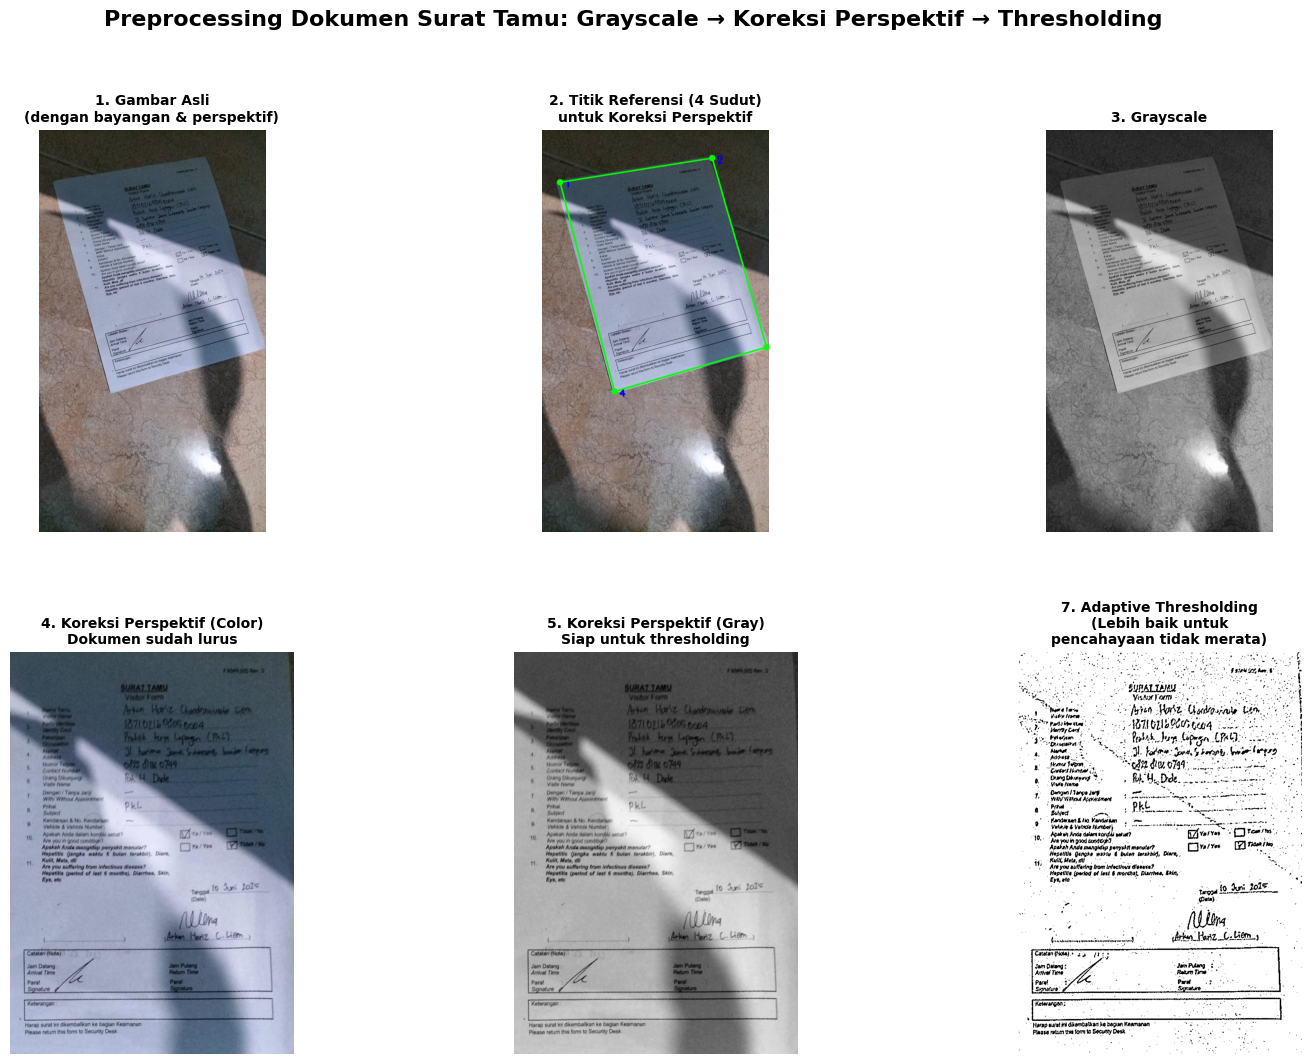

In [143]:
# Plotting
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
fig.suptitle('Preprocessing Dokumen Surat Tamu: Grayscale → Koreksi Perspektif → Thresholding', 
             fontsize=16, fontweight='bold')

# Baris 1
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(cv2.cvtColor(paper, cv2.COLOR_BGR2RGB))
ax1.set_title('1. Gambar Asli\n(dengan bayangan & perspektif)', fontsize=10, fontweight='bold')
ax1.axis('off')

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(cv2.cvtColor(paper_with_points, cv2.COLOR_BGR2RGB))
ax2.set_title('2. Titik Referensi (4 Sudut)\nuntuk Koreksi Perspektif', fontsize=10, fontweight='bold')
ax2.axis('off')

ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(paper_gray, cmap='gray')
ax3.set_title('3. Grayscale', fontsize=10, fontweight='bold')
ax3.axis('off')

# Baris 2
ax4 = fig.add_subplot(gs[1, 0])
ax4.imshow(cv2.cvtColor(paper_warped, cv2.COLOR_BGR2RGB))
ax4.set_title('4. Koreksi Perspektif (Color)\nDokumen sudah lurus', fontsize=10, fontweight='bold')
ax4.axis('off')

ax5 = fig.add_subplot(gs[1, 1])
ax5.imshow(paper_warped_gray, cmap='gray')
ax5.set_title('5. Koreksi Perspektif (Gray)\nSiap untuk thresholding', fontsize=10, fontweight='bold')
ax5.axis('off')

# Baris 3
ax6 = fig.add_subplot(gs[1, 2])
ax6.imshow(paper_adaptive, cmap='gray')
ax6.set_title('7. Adaptive Thresholding\n(Lebih baik untuk\npencahayaan tidak merata)', fontsize=10, fontweight='bold')
ax6.axis('off')

plt.show()

### Penjelasan Tahapan Pemrosesan

#### 1. Konversi ke Grayscale
- **Fungsi:** Mengubah citra berwarna menjadi citra keabuan
- **Manfaat:**
    - Mengurangi kompleksitas data dengan menghilangkan informasi warna
    - Mempermudah analisis tekstur dan bentuk
    - Mengurangi noise dan variasi yang tidak diperlukan
    - Persiapan yang baik untuk thresholding dan deteksi tepi

#### 2. Koreksi Perspektif
- **Fungsi:** Mentransformasi citra yang terdistorsi menjadi tampak frontal/tegak lurus
- **Manfaat:**
    - Memperbaiki distorsi perspektif dari pengambilan gambar miring
    - Membuat dokumen terlihat seperti dipindai dari atas
    - Memudahkan pembacaan teks dan analisis konten
    - Standarisasi orientasi untuk pemrosesan selanjutnya

#### 3. Adaptive Thresholding
- **Fungsi:** Memisahkan objek dari latar belakang dengan ambang batas lokal adaptif
- **Manfaat:**
    - Menangani variasi pencahayaan yang tidak merata
    - Menghasilkan binarisasi yang lebih baik dibanding threshold global
    - Mempertahankan detail pada area dengan kontras rendah
    - Cocok untuk dokumen dengan bayangan atau iluminasi tidak seragam

#### Peningkatan Kualitas Visual
- Gambar menjadi lebih mudah dibaca dan dianalisis
- Konten dokumen terlihat lebih jelas dan profesional
- Menghilangkan distraksi dari pencahayaan dan orientasi yang tidak ideal
- Memudahkan ekstraksi informasi dan pengolahan lanjutan

# Lampiran

## 📚 Referensi Materi

1. [Image Processing Week 1](https://github.com/informatika-itera/IF25-40305-handson/blob/main/8_image_processing_week1.ipynb)
2. [Image Processing Week 2](https://github.com/informatika-itera/IF25-40305-handson/blob/main/9_image_processing_week2.ipynb)
3. [Image Processing Week 3](https://github.com/informatika-itera/IF25-40305-handson/blob/main/10_image_processing_week3.ipynb)

## 🤖 Bantuan AI (Gemini)

| Soal | Link Percakapan |
|------|----------------|
| Soal 1 | [https://gemini.google.com/share/af8a00ce3b9e](https://gemini.google.com/share/af8a00ce3b9e) |
| Soal 2 | [https://gemini.google.com/share/51418be20432](https://gemini.google.com/share/51418be20432) |
| Soal 3 | [https://gemini.google.com/share/d45136ab9ae5](https://gemini.google.com/share/d45136ab9ae5) |
| Soal 4 | [https://gemini.google.com/share/716033696421](https://gemini.google.com/share/716033696421) |
| Soal 5 | [https://gemini.google.com/share/3b1e6d272d4e](https://gemini.google.com/share/3b1e6d272d4e) |

---

### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.